### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle

### Data preprocessing

In [3]:
data = pd.read_csv("sample30.csv")

In [4]:
# data.head(5)

In [5]:
data['user_sentiment'].value_counts()

Positive    26632
Negative     3367
Name: user_sentiment, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [7]:
# check for missing values
data.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [8]:
##########################################
## DESCRIPTIVE STATISTICS
##########################################

print ("================================================")

### Total reviews
total = len(data['reviews_text'])
print ("Number of reviews: ",total)

### How many unique reviewers?
print ("Number of unique reviewers: ",len(data['reviews_username'].unique()))
reviewer_prop = float(len(data['reviews_username'].unique())/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))

### Average star score
print ("Average rating score: ",round(data['reviews_rating'].mean(),3))

Number of reviews:  30000
Number of unique reviewers:  24915
Prop of unique reviewers:  0.831
Average rating score:  4.483


Text(0, 0.5, 'Number of Reviews')

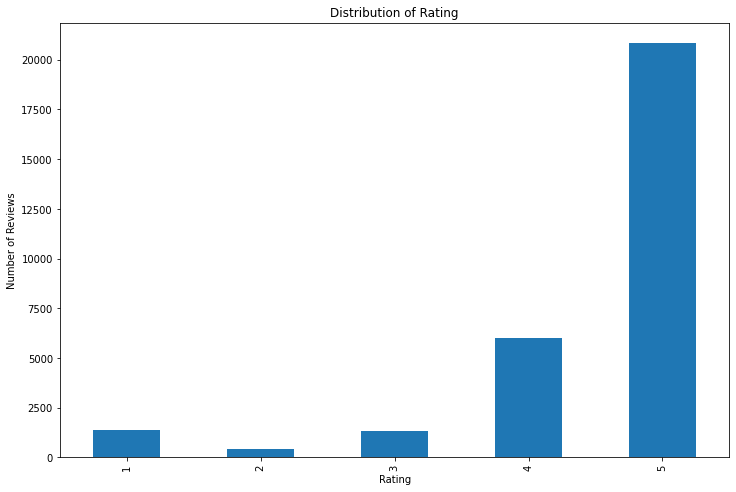

In [9]:
##########################################
## PLOT DISTRIBUTION OF RATING 
##########################################

plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
data['reviews_rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

In [10]:
##########################################
## DISTRIBUTION OF RATING SCORE
########################################## 

class_counts = data.groupby('reviews_rating').size()
class_counts

reviews_rating
1     1384
2      420
3     1345
4     6020
5    20831
dtype: int64

In [11]:
# Encode to numeric
data['user_sentiment'] = np.where(data['user_sentiment']=='Positive', 1, 0)

In [12]:
# dropping the reviews_userProvince,reviews_userCity columns

data = data.drop(['reviews_userProvince',"reviews_userCity"],axis=1)
                  

In [13]:
data.dropna(subset=['reviews_rating','reviews_username','name'])

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,joshua,1
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,dorothy w,1
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,dorothy w,1
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,rebecca,0
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T00:00:00.000Z,False,True,5,I got this conditioner with Influenster to try...,Softness!!,laurasnchz,1
29996,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-27T00:00:00.000Z,False,True,5,"I love it , I received this for review purpose...",I love it,scarlepadilla,1
29997,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,False,True,5,First of all I love the smell of this product....,Hair is so smooth after use,liviasuexo,1
29998,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-11T00:00:00.000Z,False,True,5,I received this through Influenster and will n...,Perfect for my oily hair!,ktreed95,1


### Text Pre-processing

In [14]:
# Data Cleaning
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
import unicodedata
import contractions
# from contractions import CONTRACTION_MAP
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import html

[nltk_data] Downloading package punkt to
[nltk_data]     /home/chandrakanthlns/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/chandrakanthlns/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/chandrakanthlns/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
# calculate raw tokens in order to measure of cleaned tokens
from nltk.tokenize import word_tokenize
raw_tokens = len([w for t in (data['reviews_text'].apply(word_tokenize)) for w in t])
print('Number of raw tokens: {}'.format(raw_tokens))

Number of raw tokens: 1165691


In [16]:
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

stopword_list= stopwords.words('english')

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas


In [17]:
def normalize_and_lemmaize(input_text):
    input_text = remove_special_characters(input_text)
    words = nltk.word_tokenize(input_text)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [18]:
data['clean_reviews_text'] = data['reviews_text'].map(lambda text: normalize_and_lemmaize(text))

In [19]:
data.to_csv("clean_data.csv")

In [20]:
# Remove observations that are empty after the cleaning step
data = data[data['clean_reviews_text'].str.len() != 0]

In [21]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data['clean_reviews_text'],data['user_sentiment'],
                                                test_size=0.2,random_state=42,stratify=data['user_sentiment'])

print ('Size of Training Data ', X_train.shape[0])
print ('Size of Test Data ', X_test.shape[0])

print("Distribution of classes  in Training Data: ")
print("Positive sentiment ",str(sum(y_train == 1)/ len(y_train) * 100))
print("Negative sentiment ",str(sum(y_train == 0)/ len(y_train) * 100))

print ('Distribution of classes in Testing Data :')
print ('Positive Sentiment ', str(sum(y_test == 1)/ len(y_test) * 100.0))
print ('Negative Sentiment ', str(sum(y_test == 0)/ len(y_test) * 100.0))

Size of Training Data  23999
Size of Test Data  6000
Distribution of classes  in Training Data: 
Positive sentiment  88.774532272178
Negative sentiment  11.225467727821993
Distribution of classes in Testing Data :
Positive Sentiment  88.78333333333333
Negative Sentiment  11.216666666666667


In [22]:
# Text Representation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,1))
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

### Model Building

In [23]:
# Creating a function for applying different algorithms
def modeling(Model, Xtrain = X_train_tf, Xtest = X_test_tf):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

### Logistic Regression Classifier

In [24]:
# Training the Machine Learning Model
# Call the modeling function for logistic regression with TF-IDF and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42), 
                            X_train_tf, X_test_tf)

# Assign y_pred to a variable for further process
y_pred_tfidf_logreg = y_pred

f1 score: 0.8798093388130686


In [25]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_logreg))

              precision    recall  f1-score   support

           0       0.44      0.92      0.60       673
           1       0.99      0.85      0.92      5327

    accuracy                           0.86      6000
   macro avg       0.72      0.89      0.76      6000
weighted avg       0.93      0.86      0.88      6000



### Random Forest Classifier

In [26]:
# Random Forest with TF-IDF
# Call the modeling function for random forest classifier with TF-IDF and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         X_train_tf, X_test_tf)

# Assign y_pred to a variable for further process
y_pred_tfidf_rf = y_pred

f1 score: 0.917743895230542


In [27]:
# classification report
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_rf))

              precision    recall  f1-score   support

           0       0.86      0.43      0.58       673
           1       0.93      0.99      0.96      5327

    accuracy                           0.93      6000
   macro avg       0.90      0.71      0.77      6000
weighted avg       0.92      0.93      0.92      6000



### XGBoost Classifier

In [28]:
# Call the modeling function for XGBoost with countvectorizer and print f1 score
modeling(XGBClassifier())

# Assign y_pred to a variable for further process
y_pred_cv_xgb = y_pred

/home/chandrakanthlns/miniconda3/envs/copilot/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:50:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1 score: 0.9357350498804946


In [29]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_xgb))

              precision    recall  f1-score   support

           0       0.81      0.61      0.69       673
           1       0.95      0.98      0.97      5327

    accuracy                           0.94      6000
   macro avg       0.88      0.79      0.83      6000
weighted avg       0.94      0.94      0.94      6000



In [30]:
clf = XGBClassifier()
clf.fit(X_train_tf, y_train)

# Predicting the Test set results
# y_pred = model.predict(Xtest)

/home/chandrakanthlns/miniconda3/envs/copilot/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:51:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
accuracy_score(y_test,clf.predict(X_test_tf))*100

93.95

In [33]:
filename = 'nlp_model.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [34]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_tf, y_test)
print("Test score: {0:.2f} %".format(100 * result))

Test score: 93.95 %


In [2]:
# y_pred = loaded_model.predict(X_test_tf)

In [36]:
# !pip install lime

In [37]:
# # Text Representation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,1))
X = tfidf.fit_transform(data['clean_reviews_text'])
y = data['user_sentiment']
pickle.dump(tfidf, open('tranform.pkl', 'wb'))

In [38]:
from flask import Flask, render_template, request
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import json
import urllib.request
import pickle
import requests



In [39]:
# load the nlp model and tfidf vectorizer from disk
filename = 'nlp_model.pkl'
clf = pickle.load(open(filename, 'rb'))
vectorizer = pickle.load(open('tranform.pkl','rb'))

In [40]:
data.head(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,clean_reviews_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,joshua,1,love album good hip hop side current pop sound...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,dorothy w,1,good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,dorothy w,1,good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,rebecca,0,read review look buy one couple lubricants ult...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,0,husband buy gel us gel cause irritation felt l...


In [41]:
#Import TfIdfVectorizer from the scikit-learn library
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
data['name'] = data['name'].fillna('')

#Construct the required TF-IDF matrix by applying the fit_transform method on the overview feature
tfidf_matrix = tfidf.fit_transform(data['name'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(29999, 1171)

In [42]:
# import our cosine_similarity function from sklearn
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
pd.set_option('max_colwidth', None)

In [44]:
data.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,clean_reviews_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,1,love album good hip hop side current pop sound hype listen everyday gym give star rat way metaphors crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,1,good flavor review collect part promotion


In [45]:
from nltk.tokenize import word_tokenize

def sent_words(sent):
    words = word_tokenize(sent)
    words = ",".join(words)
    return words

In [46]:
data['keywords_text'] = data['clean_reviews_text'].apply(sent_words)

In [47]:
data.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,clean_reviews_text,keywords_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,1,love album good hip hop side current pop sound hype listen everyday gym give star rat way metaphors crazy,"love,album,good,hip,hop,side,current,pop,sound,hype,listen,everyday,gym,give,star,rat,way,metaphors,crazy"
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,1,good flavor review collect part promotion,"good,flavor,review,collect,part,promotion"


### Building a customer-item matrix

In [48]:
result = pd.DataFrame({"Id":data['id'],
                       "Username" : data['reviews_username'],
                     "Product":data['name'],
                     "Rating": data['reviews_rating']})

result.head(5)



,Id,Username,Product,Rating
0,AV13O1A8GV-KLJ3akUyj,joshua,Pink Friday: Roman Reloaded Re-Up (w/dvd),5
1,AV14LG0R-jtxr-f38QfS,dorothy w,Lundberg Organic Cinnamon Toast Rice Cakes,5
2,AV14LG0R-jtxr-f38QfS,dorothy w,Lundberg Organic Cinnamon Toast Rice Cakes,5
3,AV16khLE-jtxr-f38VFn,rebecca,K-Y Love Sensuality Pleasure Gel,1
4,AV16khLE-jtxr-f38VFn,walker557,K-Y Love Sensuality Pleasure Gel,1


In [49]:
result1 = result.pivot_table(index="Id",columns=["Product","Username"],values="Rating").fillna(0)

In [50]:
result1

Product              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
Username                                                                    brewno   
Id                                                                                   
AV13O1A8GV-KLJ3akUyj                                                           0.0   
AV14LG0R-jtxr-f38QfS                                                           0.0   
AV16khLE-jtxr-f38VFn                                                           0.0   
AV1YGDqsGV-KLJ3adc-O                                                           0.0   
AV1YIch7GV-KLJ3addeG                                                           0.0   
...                                                                            ...   
AVpfthSailAPnD_xg3ON                                                           0.0   
AVpftikC1cnluZ0-p31V                                                           0.0   
AVpftymALJeJML43CZ6y                                                           0.0   
AVpfv4TlilAPnD_xhjNS                                                           0.0   
AVpfvieo1cnluZ0-qdnu                                                           0.0   

Product                                                        \
Username             embum granny smokey bear spicesea sunnie   
Id                                                              
AV13O1A8GV-KLJ3akUyj   0.0    0.0         0.0      0.0    0.0   
AV14LG0R-jtxr-f38QfS   0.0    0.0         0.0      0.0    0.0   
AV16khLE-jtxr-f38VFn   0.0    0.0         0.0      0.0    0.0   
AV1YGDqsGV-KLJ3adc-O   0.0    0.0         0.0      0.0    0.0   
AV1YIch7GV-KLJ3addeG   0.0    0.0         0.0      0.0    0.0   
...                    ...    ...         ...      ...    ...   
AVpfthSailAPnD_xg3ON   0.0    0.0         0.0      0.0    0.0   
AVpftikC1cnluZ0-p31V   0.0    0.0         0.0      0.0    0.0   
AVpftymALJeJML43CZ6y   0.0    0.0         0.0      0.0    0.0   
AVpfv4TlilAPnD_xhjNS   0.0    0.0         0.0      0.0    0.0   
AVpfvieo1cnluZ0-qdnu   0.0    0.0         0.0      0.0    0.0   

Product              100:Complete First Season (blu-Ray)                    \
Username                                        08dallas 37f5p aaronm abc3   
Id                                                                           
AV13O1A8GV-KLJ3akUyj                                 0.0   0.0    0.0  0.0   
AV14LG0R-jtxr-f38QfS                                 0.0   0.0    0.0  0.0   
AV16khLE-jtxr-f38VFn                                 0.0   0.0    0.0  0.0   
AV1YGDqsGV-KLJ3adc-O                                 0.0   0.0    0.0  0.0   
AV1YIch7GV-KLJ3addeG                                 0.0   0.0    0.0  0.0   
...                                                  ...   ...    ...  ...   
AVpfthSailAPnD_xg3ON                                 0.0   0.0    0.0  0.0   
AVpftikC1cnluZ0-p31V                                 0.0   0.0    0.0  0.0   
AVpftymALJeJML43CZ6y                                 0.0   0.0    0.0  0.0   
AVpfv4TlilAPnD_xhjNS                                 0.0   0.0    0.0  0.0   
AVpfvieo1cnluZ0-qdnu                                 0.0   0.0    0.0  0.0   

Product               ... Yes To Grapefruit Rejuvenating Body Wash        \
Username              ...                                  mwhit02 neena   
Id                    ...                                                  
AV13O1A8GV-KLJ3akUyj  ...                                      0.0   0.0   
AV14LG0R-jtxr-f38QfS  ...                                      0.0   0.0   
AV16khLE-jtxr-f38VFn  ...                                      0.0   0.0   
AV1YGDqsGV-KLJ3adc-O  ...                                      0.0   0.0   
AV1YIch7GV-KLJ3addeG  ...                                      0.0   0.0   
...                   ...                                      ...   ...   
AVpfthSailAPnD_xg3ON  ...                                      0.0   0.0   
AVpftikC1cnluZ0-p31V  ...      

In [51]:
allreviewids = result1.values
reviews = allreviewids[0]

In [52]:
denom = np.sqrt(sum(np.square(x) for x in reviews))

In [53]:
cosinesimiilarity = [("AV1YIch7GV-KLJ3addeG",1)]
i = 1
for review in allreviewids[1:]:
    numerator = [x*y for x,y in zip(reviews,review)]
    denom2 = np.sqrt(sum(np.square(x) for x in review))
    costheta = sum(numerator) / (denom * denom2)
    
    cosinesimiilarity.append((result1.index[i],costheta))
    i +=1
cosinesimiilarity.sort(key=lambda x: x[1],reverse=True)

sim20users = cosinesimiilarity[0:20]
    

In [54]:
sim20users

[('AV1YIch7GV-KLJ3addeG', 1),
 ('AV14LG0R-jtxr-f38QfS', 0.0),
 ('AV16khLE-jtxr-f38VFn', 0.0),
 ('AV1YGDqsGV-KLJ3adc-O', 0.0),
 ('AV1YIch7GV-KLJ3addeG', 0.0),
 ('AV1YlENIglJLPUi8IHsX', 0.0),
 ('AV1YmBrdGV-KLJ3adewb', 0.0),
 ('AV1YmDL9vKc47QAVgr7_', 0.0),
 ('AV1Ymf_rglJLPUi8II2v', 0.0),
 ('AV1Yn94nvKc47QAVgtst', 0.0),
 ('AV1YnUMYglJLPUi8IJpK', 0.0),
 ('AV1Ynb3bglJLPUi8IJxJ', 0.0),
 ('AV1YneDPglJLPUi8IJyQ', 0.0),
 ('AV1Yo6FPglJLPUi8IK3u', 0.0),
 ('AV1YpiJvvKc47QAVguxy', 0.0),
 ('AV1YqAaMGV-KLJ3adiDj', 0.0),
 ('AV1Ys0kTvKc47QAVgx1C', 0.0),
 ('AV1YtGjdglJLPUi8IOfJ', 0.0),
 ('AV1ZSp2uglJLPUi8IQFy', 0.0),
 ('AV1ZT7GLglJLPUi8IQLI', 0.0)]

In [55]:
# import our cosine_similarity function from sklearn
from sklearn.metrics.pairwise import cosine_similarity

In [56]:
# Let's use the sklearn cosine_similarity function to compute the pairwise cosine similarities between the cusomters 

user_user_sim_matrix = pd.DataFrame(cosine_similarity(result1))


In [57]:
# Let's now re-label the columns so that it's easier to understand


user_user_sim_matrix.columns = result1.index

user_user_sim_matrix['Id'] = result1.index

user_user_sim_matrix = user_user_sim_matrix.set_index('Id')
user_user_sim_matrix.head()

Id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
Id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Sort on the customers most similar to AV14LG0R-jtxr-f38QfS
user_user_sim_matrix.loc["AV14LG0R-jtxr-f38QfS"].sort_values(ascending=False).reset_index().iloc[1:,0][:5].tolist()

['AVpfNglu1cnluZ0-gQ7x',
 'AVpfP-rELJeJML435jEN',
 'AVpfOrD0ilAPnD_xXrRj',
 'AVpfOmKwLJeJML435GM7',
 'AVpfOfIqLJeJML435D06']

In [59]:
# We use the `nonzero` function in the pandas package as it returns the integer indexes of the elements of the non-zero columns (hence the items bought).
items_bought_by_AVpfPjqKLJeJML435aZR = set(result1.loc["AVpfPjqKLJeJML435aZR"].iloc[result1.loc["AVpfPjqKLJeJML435aZR"].to_numpy().nonzero()].index)
items_bought_by_AVpfPjqKLJeJML435aZR

{('Voortman Sugar Free Fudge Chocolate Chip Cookies', 'debbie'),
 ('Voortman Sugar Free Fudge Chocolate Chip Cookies', 'judydo'),
 ('Voortman Sugar Free Fudge Chocolate Chip Cookies', 'theunit'),
 ('Voortman Sugar Free Fudge Chocolate Chip Cookies', 'windowkitty')}

In [60]:
for i_te in items_bought_by_AVpfPjqKLJeJML435aZR:
    print(i_te[0],i_te[1])

Voortman Sugar Free Fudge Chocolate Chip Cookies judydo
Voortman Sugar Free Fudge Chocolate Chip Cookies theunit
Voortman Sugar Free Fudge Chocolate Chip Cookies debbie
Voortman Sugar Free Fudge Chocolate Chip Cookies windowkitty


In [61]:
def review_id(username,reviewid):
    items_bought = set(result1.loc[reviewid].iloc[result1.loc[reviewid].to_numpy().nonzero()].index)
    for each_user in items_bought:
        user = each_user[1]
        item = each_user[0]
    return item
    

In [62]:
def get_items_to_recommend_cust(username,cust_a="AVpfPjqKLJeJML435aZR"):
    '''returns the items to recommend to a customer using customer similarity'''
    most_similar_user = user_user_sim_matrix.loc[cust_a].sort_values(ascending=False).reset_index().iloc[1:,0][:5].tolist()
    items_bought_by_cust_a = set(result1.loc[most_similar_user].iloc[result1.loc[most_similar_user].to_numpy().nonzero()].index)
    items_brought = review_id(username,cust_a)
    return items_brought

In [63]:
get_items_to_recommend_cust("debbie")

'Voortman Sugar Free Fudge Chocolate Chip Cookies'

### Item Based Collaborative Filtering

In [64]:
# Transposing our customer_item_matrix 
item_item_sim_matrix = pd.DataFrame(cosine_similarity(result1.T))
item_item_sim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,27577,27578,27579,27580,27581,27582,27583,27584,27585,27586
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

item_item_sim_matrix.columns = result1.T.index

item_item_sim_matrix['Product'] = result1.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('Product')
item_item_sim_matrix.head()

In [68]:
# Most similar items to 100:Complete First Season (blu-Ray)

item_item_sim_matrix.loc['Yes To Grapefruit Rejuvenating Body Wash'].sort_values(ascending=False)

In [69]:
# Get the top 10 most similar items 
top_10_similar_items = list(item_item_sim_matrix.loc['100:Complete First Season (blu-Ray)'].sort_values(ascending=False).iloc[:10].index)
top_10_similar_items

In [70]:
def get_top_similar_items(item):
    top_10_similar_items = list(item_item_sim_matrix.loc[item].sort_values(ascending=False).iloc[:10].index)
    top_10 = result.loc[result['Product'].isin(top_10_similar_items), ['Product', 'Rating']].drop_duplicates().set_index('Product').loc[top_10_similar_items]
    return top_10

In [71]:
get_top_similar_items("Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack")